# 1- Load data and extract new columns

In [407]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date
from sklearn import preprocessing
from IPython.display import Image
from IPython.core.display import HTML, display
import PIL.Image as pImage
import requests
from io import BytesIO


In [158]:
SGDS = pd.read_csv('data/socialgood-datascience_tweets.csv', parse_dates=['date'])
SGDS.drop(['geo'], axis = 1, inplace=True)
SGDS.head(1)

,date,favorites,hashtags,id,mentions,permalink,retweets,text,username
0,2018-03-28 17:44:28,6,#datascience #socialgood #socialimpact #data,979112007982084097,NaN,https://twitter.com/fromJupyter/status/9791120...,1,Data Science Mentors Needed! Join the Data Sci...,fromJupyter


In [159]:
SGAI = pd.read_csv('data/socialgood-ai_tweets.csv', parse_dates=['date'])
SGAI.drop(['geo'], axis = 1, inplace=True)
#SGAI.describe()

In [160]:
SGML = pd.read_csv('data/socialgood-ML_tweets.csv', parse_dates=['date'])
SGML.drop(['geo'], axis = 1, inplace=True)
#SGML.describe()

In [161]:
SGDS_SGAI = pd.concat([SGDS,SGAI]).drop_duplicates().reset_index(drop=True)
#SGDS_SGAI.describe()

In [162]:
all_tweets = pd.concat([SGDS_SGAI,SGML]).drop_duplicates().reset_index(drop=True)

In [163]:
#missing data
total = all_tweets.isnull().sum().sort_values(ascending=False)
percent = (all_tweets.isnull().sum()/all_tweets.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
mentions,585,0.481878
username,0,0.000000
text,0,0.000000
retweets,0,0.000000
permalink,0,0.000000
id,0,0.000000
hashtags,0,0.000000
favorites,0,0.000000
date,0,0.000000


In [466]:
all_tweets = all_tweets.fillna('')
all_tweets['hashtags_list'] = all_tweets.hashtags.str.lower().apply(lambda x: x.split('#'))
all_tweets['hashtags_list'] = all_tweets[['hashtags_list']].applymap(lambda x: list(filter(None, x)))
all_tweets['mentions_list'] = all_tweets.mentions.str.lower().apply(lambda x: x.split('@'))
all_tweets['mentions_list'] = all_tweets[['mentions_list']].applymap(lambda x: list(filter(None, x)))
 

all_tweets["count_hashtags"] = all_tweets[['hashtags']].applymap(lambda x: str.count(x, '#'))
all_tweets["count_mentions"] = all_tweets[['mentions']].applymap(lambda x: str.count(x, '@'))

In [244]:
all_tweets.hashtags_list[0]

['datascience ', 'socialgood ', 'socialimpact ', 'data']

In [256]:
lbl = preprocessing.LabelEncoder()
all_tweets['username_id'] = lbl.fit_transform(all_tweets['username'])
all_tweets.head(5)

list_of_original_tweets = [element for element in all_tweets['text'].values if element.startswith('RT')]
print(len(list_of_original_tweets))
list_of_original_tweets[0]

68


'RT:machinelearnbot: RT LifeAtBooz: What skills is your job teaching you? Our employees are tackling #datascience & using it for #socialgood : http:// bit.ly/2lxMKGV pic.twitter.com/P6gctllK2Z'

In [247]:
all_tweets.describe()

,favorites,id,retweets,count_hashtags,count_mentions,username_id
count,1214.000000,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000
mean,2.767710,7.848173e+17,1.931631,4.173806,0.785832,312.545305
std,5.863696,1.321034e+17,5.544345,2.631273,1.003011,177.277099
min,0.000000,4.466982e+17,0.000000,2.000000,0.000000,0.000000
25%,0.000000,6.696662e+17,0.000000,3.000000,0.000000,153.250000
50%,1.000000,8.144057e+17,0.000000,3.000000,1.000000,334.000000
75%,3.000000,8.933947e+17,2.000000,5.000000,1.000000,458.750000
max,95.000000,9.794012e+17,88.000000,27.000000,9.000000,609.000000



# 2- Analyse each column: 



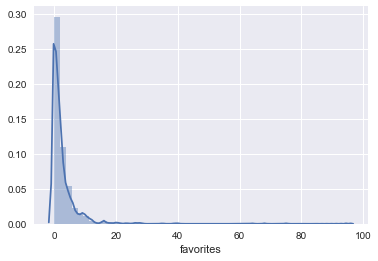

In [167]:
sns.distplot(all_tweets['favorites']);

In [168]:
all_tweets['favorites'].describe()


count    1214.000000
mean        2.767710
std         5.863696
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        95.000000
Name: favorites, dtype: float64

**The mean favorite count is : 2.7**

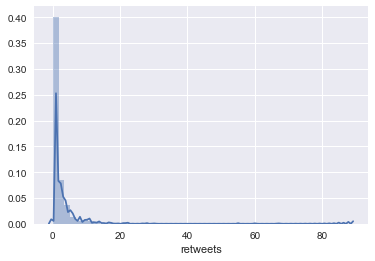

In [169]:
sns.distplot(all_tweets['retweets']);

In [170]:
all_tweets['retweets'].describe()

count    1214.000000
mean        1.931631
std         5.544345
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        88.000000
Name: retweets, dtype: float64

**The mean retweets count is : 1.9**

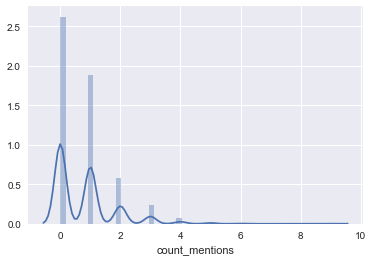

In [171]:
sns.distplot(all_tweets['count_mentions']);

In [172]:
all_tweets['count_mentions'].describe()

count    1214.000000
mean        0.785832
std         1.003011
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: count_mentions, dtype: float64

**The mean mentions count is : 0.78**

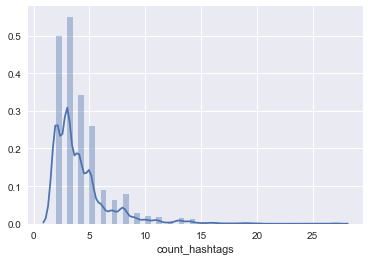

In [173]:
sns.distplot(all_tweets['count_hashtags']);

In [174]:
all_tweets['count_hashtags'].describe()

count    1214.000000
mean        4.173806
std         2.631273
min         2.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        27.000000
Name: count_hashtags, dtype: float64

**The mean hashtag count is : 4.17**

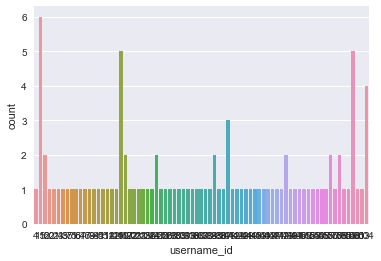

In [263]:
#sns.distplot(all_tweets['username_id']);
sns.countplot(x="username_id", data=all_tweets.head(100), orient='v');

In [176]:
all_tweets['username_id'].describe()

count    1214.000000
mean      312.545305
std       177.277099
min         0.000000
25%       153.250000
50%       334.000000
75%       458.750000
max       609.000000
Name: username_id, dtype: float64

**The unique members tweeted are : 609**

# 3 - See correlations among 2 variables

**Does the retweet count increases by number of mentions or hashtags ??**

* Obviously, for all tweets with >4 mentions or >10 hashtags, we dont see a high number for re-tweet count in below charts.


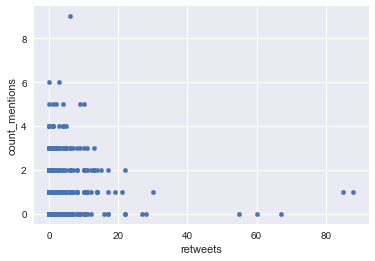

In [180]:
#scatter plot favorites/retweets
var = 'retweets'
data = pd.concat([all_tweets['count_mentions'], all_tweets[var]], axis=1)
data.plot.scatter(x=var, y='count_mentions');

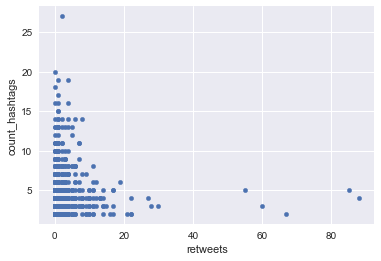

In [178]:
#scatter plot favorites/retweets
var = 'retweets'
data = pd.concat([all_tweets['count_hashtags'], all_tweets[var]], axis=1)
data.plot.scatter(x=var, y='count_hashtags');

**Does the favorites count increases by number of mentions or hashtags ??**

* Obviously, for all tweets with >4 mentions or >10 hashtags, we dont see a high number for favorites count in below charts.


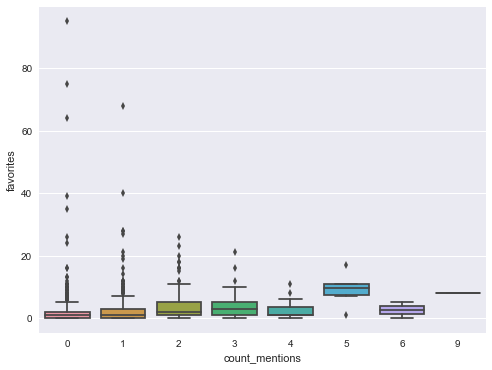

In [181]:
#box plot overallqual/saleprice
var = 'count_mentions'
data = pd.concat([all_tweets['favorites'], all_tweets[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="favorites", data=data)

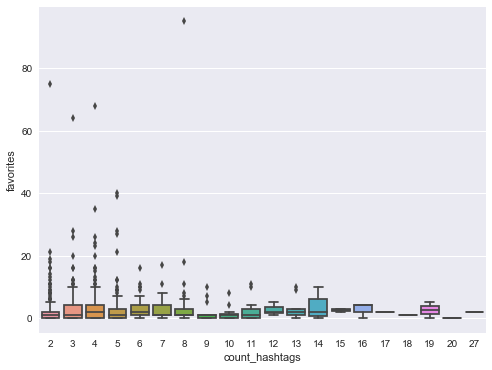

In [106]:
#box plot overallqual/saleprice
var = 'count_hashtags'
data = pd.concat([all_tweets['favorites'], all_tweets[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="favorites", data=data)

**Lets see the correlation among all columns**

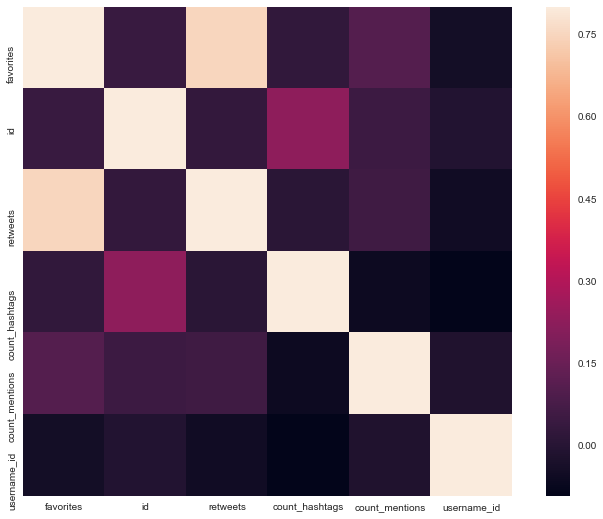

In [182]:
#correlation matrix
corrmat = all_tweets.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


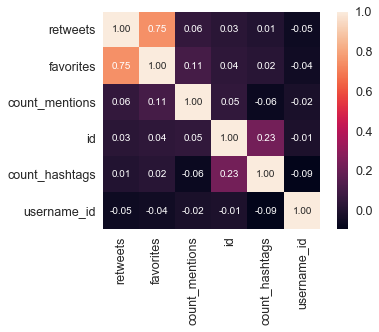

In [183]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'retweets')['retweets'].index
cm = np.corrcoef(all_tweets[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


**Observations:**
1. 75% correlation between retweet count and favorites count. It makes perfect sense as more people will like if the tweet reach more people.
2. This is very interesting to see 23% correlation between tweet_id, hashtag_count. If we see the below correlation between id and count_hashtags, we can see small tendency of using more hastags with increase in id value. This tells that people are using more hastags in recent time than before, makes perfect sense.

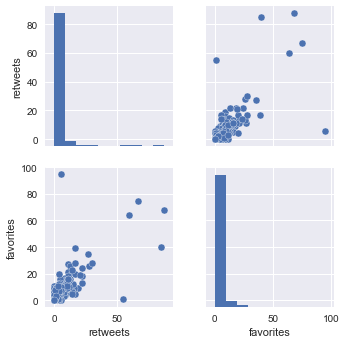

In [189]:
#scatterplot
sns.set()
cols = ['retweets',  'favorites']
sns.pairplot(all_tweets[cols], size = 2.5)
plt.show();

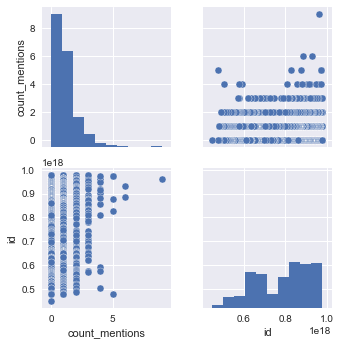

In [190]:
#scatterplot
sns.set()
cols = ['count_mentions', 'id']
sns.pairplot(all_tweets[cols], size = 2.5)
plt.show();


# 4 - Most Influential people

In [458]:
def grid_display(list_of_images, list_of_titles=[], list_of_profile_urls=[], no_of_columns=5, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        response = requests.get(list_of_images[i])
        img = pImage.open(BytesIO(response.content))

        plt.imshow(img)
        plt.axis('off')
        #plt.axis.Axis.set_url(list_of_profile_urls[i])
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i], fontsize = 13)

In [459]:
def display_influential(df):
    print("profile_name - no_of_tweets - link_to_profile")
    list_of_images = []
    list_of_titles = []
    list_of_profile_urls = []
    for index, row in df.iterrows():
        p_url = 'https://twitter.com/'+ row['username'] +'/profile_image?size=original'
        list_of_images.append(p_url)
        list_of_titles.append(str(row['Size']) + ' - ' + row['username'])
        list_of_profile_urls.append("https://twitter.com/" + row['username'] )
        
    grid_display(list_of_images, list_of_titles, list_of_profile_urls)

profile_name - no_of_tweets - link_to_profile


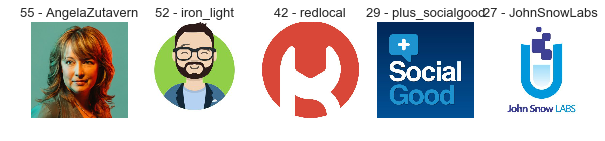

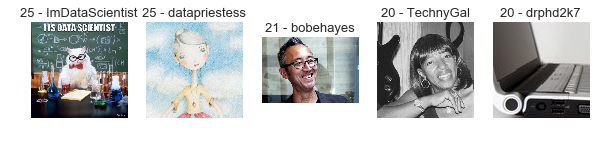

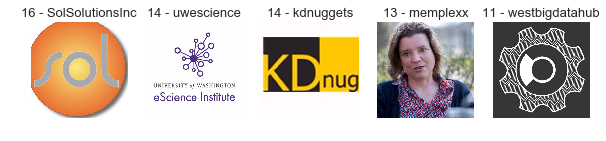

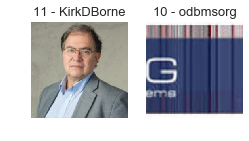

In [460]:
groups = all_tweets.copy(deep=True)
groups = groups[['username_id', 'username']]
groups = groups.groupby(['username_id', 'username']).size().reset_index(name='Size')
groups = groups.sort_values(by=['Size'], ascending=False)
groups = groups[groups['Size'] >= 10]

display_influential(groups)

# 5 - Analyse Co-occurring hashtags

Lets Analyse co-occurring hastags that we might want to include in our data collection.(If related to socialgood topic)

In [475]:
 pd.Series(' '.join(all_tweets['hashtags']).lower().split('#')).value_counts()[:15]


socialgood                 1215
datascience                 679
ai                          564
bigdata                     162
machinelearning              79
analytics                    64
data4good                    51
hackathon                    47
opensource                   47
data                         45
odsc                         43
tech                         43
artificialintelligence       39
startup                      36
impact                       30
dtype: int64